In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from keras.models import Sequential
from keras.layers import Dense

# **Шаг 1: Загрузка и первичный анализ данных**

**Цель:** Загрузить датасет и выполнить его первичный анализ, чтобы понять структуру данных и выявить возможные проблемы (пропуски, неверные типы и т.д.).


In [61]:
df = pd.read_csv('/kaggle/input/spotify/dataset.csv')

In [62]:
df.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

Проверка наличия пропущенных значений

In [64]:
#Статистическое описание числовых признаков:
df.describe()

,Unnamed: 0,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,114000.000000,114000.000000,1.140000e+05,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000
mean,56999.500000,33.238535,2.280292e+05,0.566800,0.641383,5.309140,-8.258960,0.637553,0.084652,0.314910,0.156050,0.213553,0.474068,122.147837,3.904035
std,32909.109681,22.305078,1.072977e+05,0.173542,0.251529,3.559987,5.029337,0.480709,0.105732,0.332523,0.309555,0.190378,0.259261,29.978197,0.432621
min,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28499.750000,17.000000,1.740660e+05,0.456000,0.472000,2.000000,-10.013000,0.000000,0.035900,0.016900,0.000000,0.098000,0.260000,99.218750,4.000000
50%,56999.500000,35.000000,2.129060e+05,0.580000,0.685000,5.000000,-7.004000,1.000000,0.048900,0.169000,0.000042,0.132000,0.464000,122.017000,4.000000
75%,85499.250000,50.000000,2.615060e+05,0.695000,0.854000,8.000000,-5.003000,1.000000,0.084500,0.598000,0.049000,0.273000,0.683000,140.071000,4.000000
max,113999.000000,100.000000,5.237295e+06,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000


In [65]:
df.isnull().sum()

Unnamed: 0          0
track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

**Вывод:** В датасете есть пропуски в столбцах 'artists', 'album_name' и 'track_name'.


# **Шаг 2: Обработка пропущенных значений**

**Цель:** Заполнить пропуски в категориальных столбцах значениями по умолчанию.

In [66]:
# Заполнение пропусков
columns_with_nan = ['artists', 'album_name', 'track_name']
for col in columns_with_nan:
    df[col].fillna('Unknown', inplace=True)

/tmp/ipykernel_24/669303768.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna('Unknown', inplace=True)


**Вывод:** Пропуски заполнены значением 'Unknown' в категориальных столбцах.


# **Шаг 3: Обработка категориальных признаков и удаление ненужных столбцов**
**Цель:** Преобразовать категориальные признаки в числовые значения для последующего анализа и построения моделей.


In [67]:
categorical_columns = ['track_id', 'artists', 'album_name', 'track_name', 'track_genre']


In [68]:
# Преобразование категориальных признаков в числовые с помощью Label Encoding
from sklearn.preprocessing import LabelEncoder

for col in categorical_columns:
    encoder = LabelEncoder()
    df[col] = encoder.fit_transform(df[col].astype(str))

**Вывод:** Категориальные признаки преобразованы в числовые.

# **Шаг 4: Анализ корреляции числовых признаков**

**Цель:** Исследовать корреляцию между числовыми признаками, чтобы выявить мультиколлинеарность и важные признаки для прогнозирования популярности.


In [69]:
# Выбираем только числовые признаки
numerical_features = df.select_dtypes(include=['int64', 'float64'])

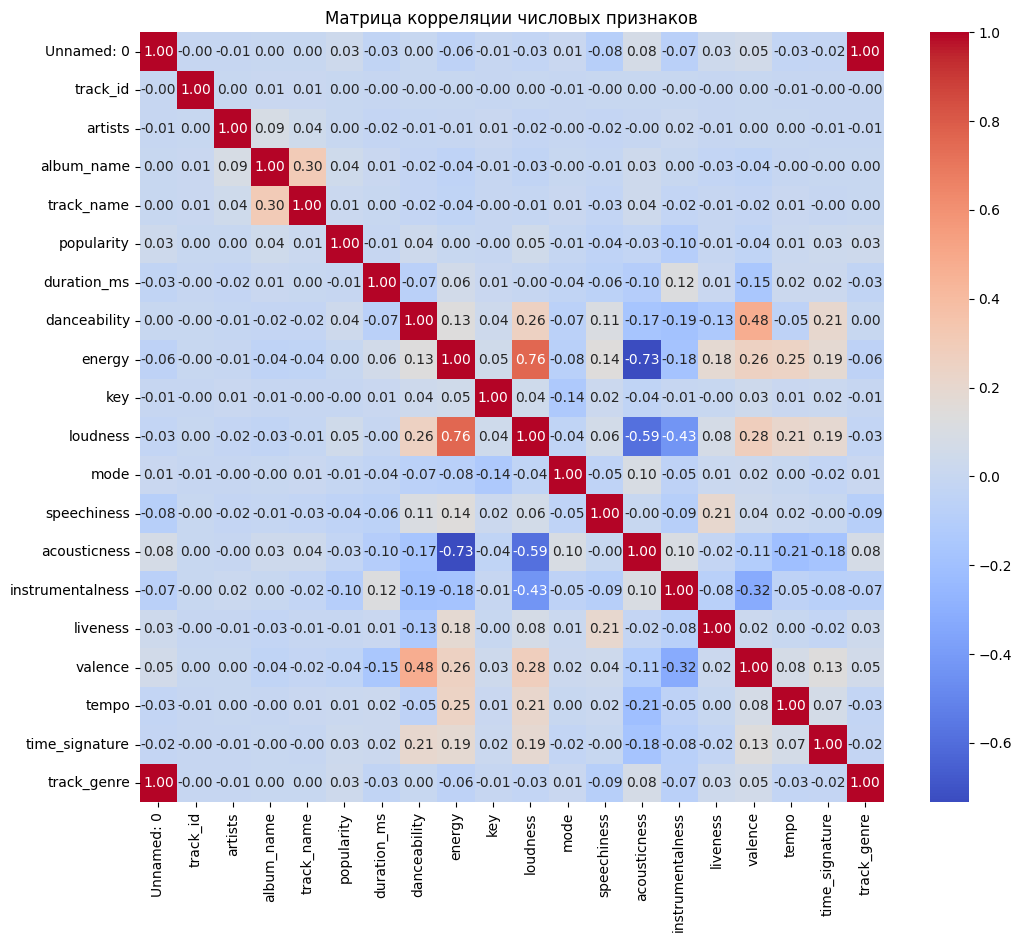

In [70]:
# Строим корреляционную матрицу
corr_matrix = numerical_features.corr()

# Визуализация тепловой карты корреляции
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', cbar=True)
plt.title('Матрица корреляции числовых признаков')
plt.show()

**Вывод:** На матрице можно увидеть, какие признаки сильно коррелируют друг с другом и с популярностью.


# **Шаг 5: Построение графиков EDA**

**Цель:** Провести исследовательский анализ данных (EDA), чтобы выявить закономерности и возможные выбросы.


**1. График распределения популярности песен**
*Цел :  Исследовать распределение популярности песен, чтобы понять, как часто встречаются треки с разной популярностью. Это поможет выявить редкие и наиболее популярные песни.


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


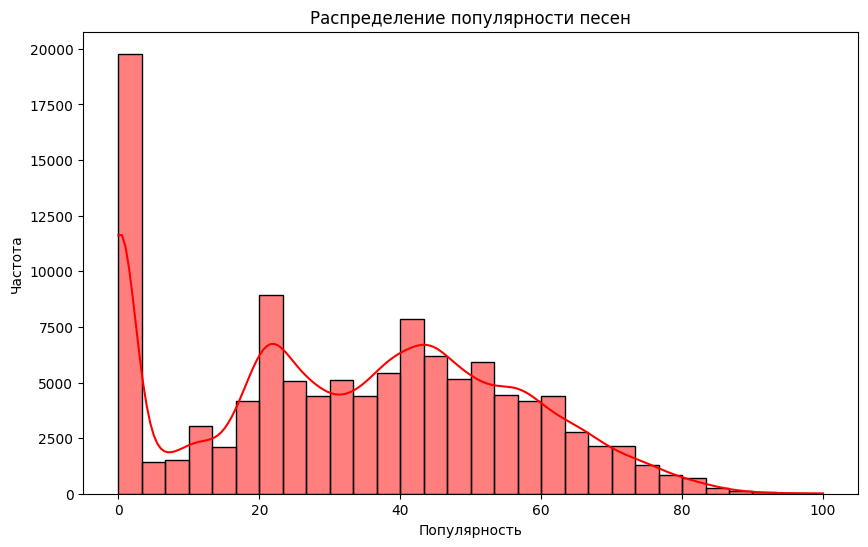

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.histplot(df['popularity'], bins=30, kde=True, color='red')
plt.title('Распределение популярности песен')
plt.xlabel('Популярность')
plt.ylabel('Частота')
plt.show()

**Вывод:** Популярность песен с значением 0 встречается наиболее часто, с частотой почти 20,000. Это может свидетельствовать о том, что большинство песен в наборе данных имеют низкую популярность или не были широко распространены. График полезен, так как позволяет увидеть, что существует широкий диапазон популярности песен, но большинство песен все-таки имеют низкие или средние значения.

**2. График взаимосвязи популярности и продолжительности песни**

**Цель:** Проанализировать зависимость популярности от продолжительности песни. Это поможет определить, влияет ли длительность песни на её популярность.

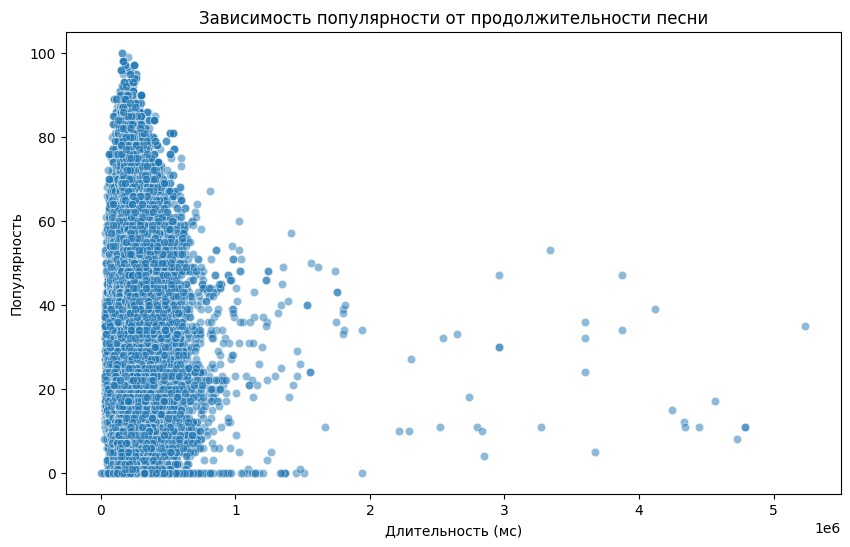

In [72]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['duration_ms'], y=df['popularity'], alpha=0.5)
plt.title('Зависимость популярности от продолжительности песни')
plt.xlabel('Длительность (мс)')
plt.ylabel('Популярность')
plt.show()

**Вывод:** График показывает, что популярность песен имеет зависимость от их длительности. 

**3. Матрица корреляции признаков**

**Цель:** Исследовать взаимосвязь между признаками в датасете. Это поможет понять, какие признаки связаны с популярностью песен и могут быть важны для построения моделей машинного обучения.

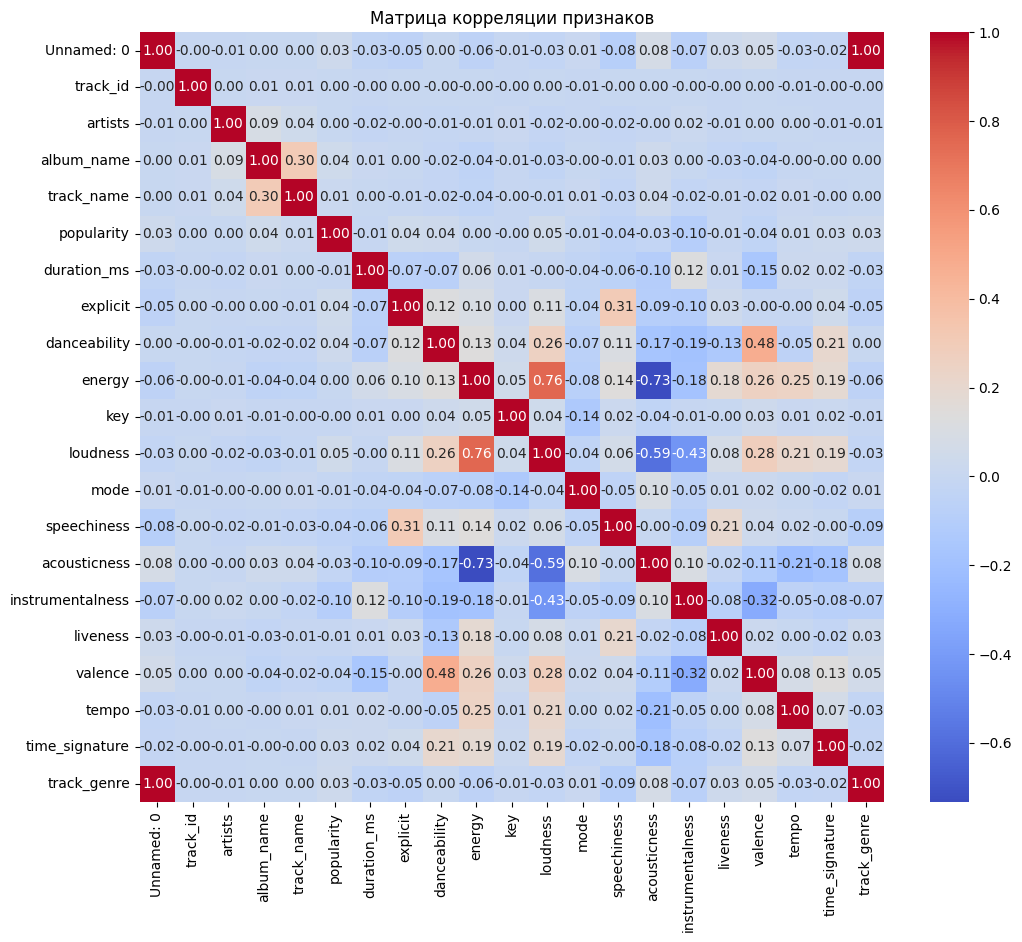

In [73]:
plt.figure(figsize=(12, 10))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Матрица корреляции признаков')
plt.show()

**Вывод:** На матрице корреляции можно заметить, что такие признаки, как "energy" и "loudness", имеют значительную корреляцию с популярностью. Это может указывать на то, что более энергичные песни чаще становятся популярными.

**4. Боксплот для популярности по жанрам**

**Цель:** Сравнить популярность песен в разных жанрах, чтобы выявить жанры с более высокой популярностью. Это позволит понять, какие жанры более востребованы.

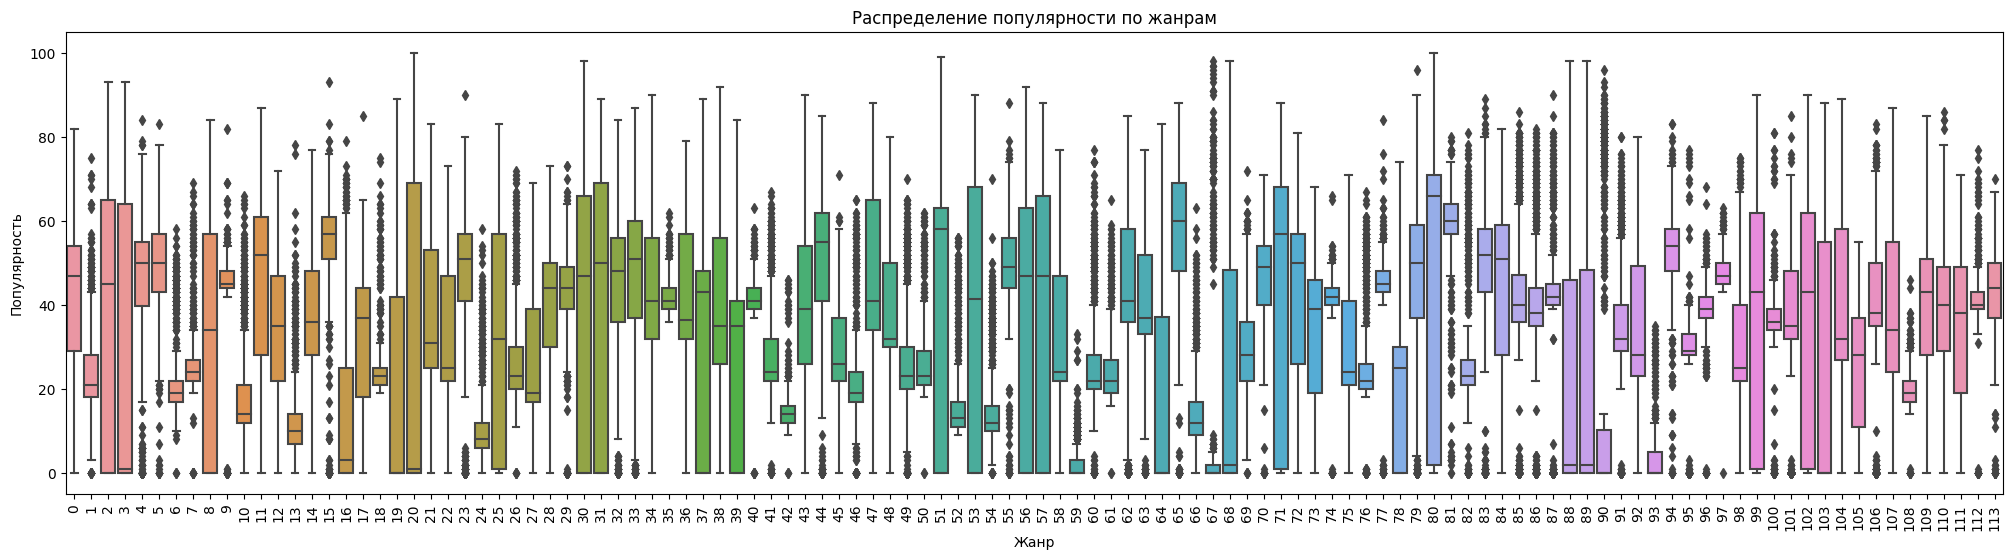

In [74]:
plt.figure(figsize=(25, 6))
sns.boxplot(x='track_genre', y='popularity', data=df)
plt.title('Распределение популярности по жанрам')
plt.xticks(rotation=90)
plt.xlabel('Жанр')
plt.ylabel('Популярность')
plt.show()


**5. График распределения акустичности (acousticness)**

**Цель:** Исследовать распределение акустичности песен. Это поможет понять, насколько популярны более "акустические" песни и их частоту в датасете.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


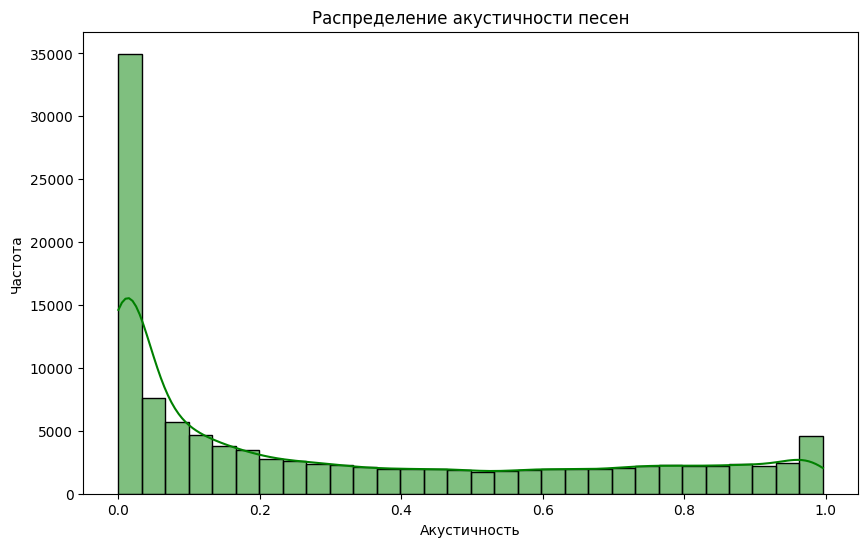

In [75]:
plt.figure(figsize=(10, 6))
sns.histplot(df['acousticness'], bins=30, kde=True, color='green')
plt.title('Распределение акустичности песен')
plt.xlabel('Акустичность')
plt.ylabel('Частота')
plt.show()


**Вывод:**

# **Шаг 6: Feature Engineering**

**Цель:** Создание новых признаков для улучшения предсказательной способности модели.

In [76]:
# Признак длины песни в секундах
df['duration_sec'] = df['duration_ms'] / 1000

In [77]:
# Нормализованный признак громкости
max_loudness = df['loudness'].max()
df['normalized_loudness'] = df['loudness'] / max_loudness

In [78]:
# Признак средней танцевальности по жанрам
df['mean_danceability'] = df.groupby('track_genre')['danceability'].transform('mean')

In [79]:
# Признак для оптимального темпа по жанрам (например, средний темп по жанру)
mean_tempo_per_genre = df.groupby('track_genre')['tempo'].transform('mean')
df['is_optimal_tempo'] = (df['tempo'] > mean_tempo_per_genre * 0.9) & (df['tempo'] < mean_tempo_per_genre * 1.1)


**Вывод:** Добавлены новые признаки: 'duration_sec', 'normalized_loudness', 'mean_danceability', 'is_optimal_tempo'.

In [80]:
df.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,instrumentalness,liveness,valence,tempo,time_signature,track_genre,duration_sec,normalized_loudness,mean_danceability,is_optimal_tempo
0,0,62846,10357,8100,11741,73,230666,False,0.676,0.4610,...,0.000001,0.3580,0.715,87.917,4,0,230.666,-1.488526,0.549593,False
1,1,55668,3287,14796,22528,55,149610,False,0.420,0.1660,...,0.000006,0.1010,0.267,77.489,4,0,149.610,-3.802957,0.549593,False
2,2,19766,12397,39162,60774,57,210826,False,0.438,0.3590,...,0.000000,0.1170,0.120,76.332,4,0,210.826,-2.147838,0.549593,False
3,3,77942,14839,8580,9580,71,201933,False,0.266,0.0596,...,0.000071,0.1320,0.143,181.740,3,0,201.933,-4.085393,0.549593,False
4,4,68242,5255,16899,25689,82,198853,False,0.618,0.4430,...,0.000000,0.0829,0.167,119.949,4,0,198.853,-2.136143,0.549593,True


# **Шаг 7: Разделение на обучающую и тестовую выборки**

**Цель:** Разделить данные на обучающую и тестовую выборки для дальнейшего обучения модели.

In [81]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [82]:
# Отделяем целевую переменную (popularity) и признаки
X = df[['duration_sec', 'normalized_loudness', 'mean_danceability', 'is_optimal_tempo']]
y = df['popularity']

In [83]:
# Разделяем данные на обучающую (80%) и тестовую (20%) выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# **Шаг 7: Обучение моделей и их оценка**

**Цель:** Обучить модель на обучающих данных и оценить ее качество.

In [84]:
# Создаем и обучаем модель RandomForestRegressor
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Прогнозируем популярность для тестовых данных
y_pred = rf_model.predict(X_test)

# Оценка качества модели
from sklearn.metrics import mean_squared_error, r2_score

# Вычисляем среднеквадратичную ошибку (MSE) и коэффициент детерминации (R^2)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nСреднеквадратичная ошибка (MSE):", mse)
print("Коэффициент детерминации (R^2):", r2)


Среднеквадратичная ошибка (MSE): 309.8983899754115
Коэффициент детерминации (R^2): 0.37201541290588824


Чем меньше значение MSE, тем лучше модель, так как это означает, что разница между предсказаниями и реальными значениями мала.

In [85]:
# Линейная Регрессия
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)
# Оценка линейной регрессии
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)
print(f"\nЛинейная Регрессия: MSE = {mse_linear:.2f}, R^2 = {r2_linear:.2f}")



Линейная Регрессия: MSE = 491.95, R^2 = 0.00


In [86]:
# Градиентный Бустинг
gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)

# Оценка градиентного бустинга
mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)
print(f"\nГрадиентный Бустинг: MSE = {mse_gb:.2f}, R^2 = {r2_gb:.2f}")


Градиентный Бустинг: MSE = 390.08, R^2 = 0.21


In [87]:
# Нейронная Сеть
nn_model = Sequential()
nn_model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
nn_model.add(Dense(32, activation='relu'))
nn_model.add(Dense(1))

# Компиляция и обучение нейронной сети
nn_model.compile(optimizer='adam', loss='mean_squared_error')
nn_model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=0)

# Прогнозы нейронной сети
y_pred_nn = nn_model.predict(X_test)

# Оценка нейронной сети
mse_nn = mean_squared_error(y_test, y_pred_nn)
r2_nn = r2_score(y_test, y_pred_nn)
print(f"\nНейронная Сеть: MSE = {mse_nn:.2f}, R^2 = {r2_nn:.2f}")

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step

Нейронная Сеть: MSE = 470.89, R^2 = 0.05


# **Шаг 8: Визуализация важности признаков для моделей RandomForest и GradientBoosting**

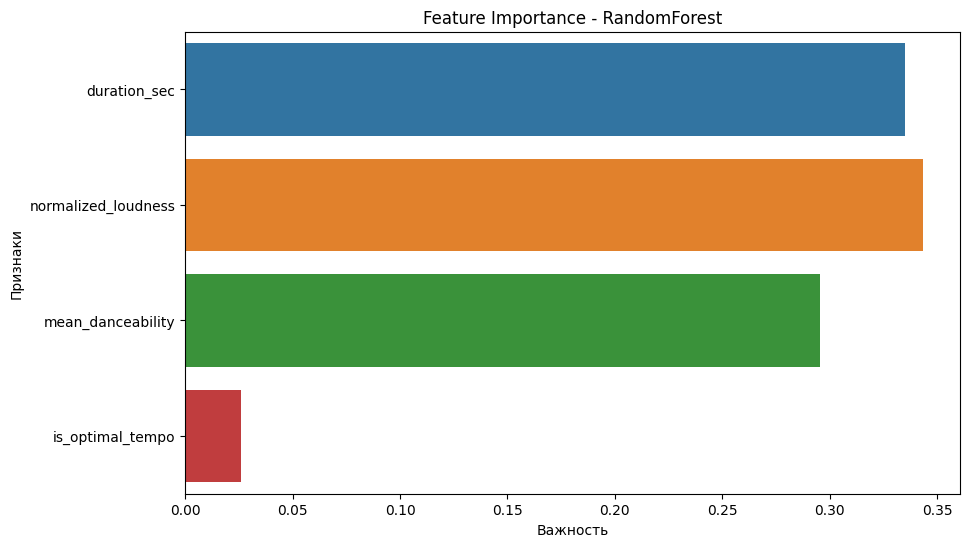

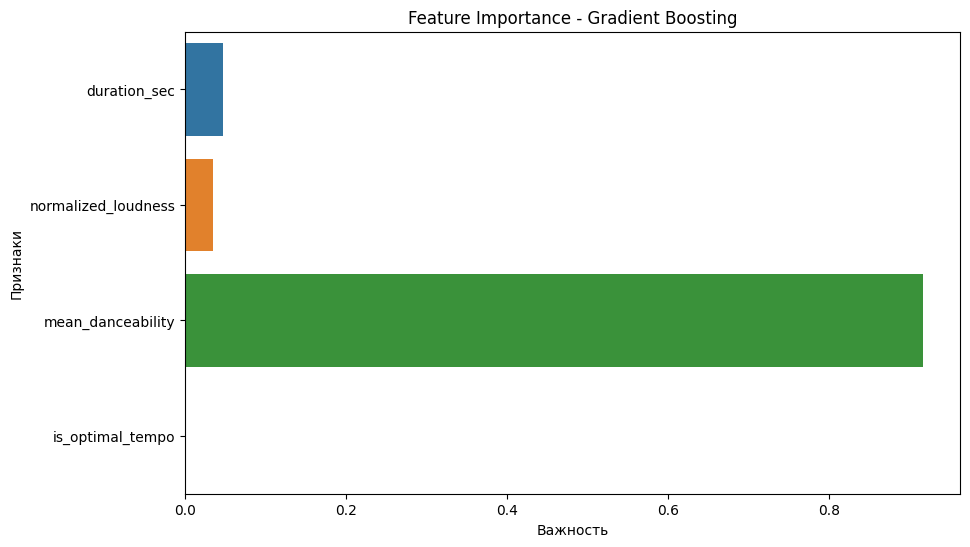

In [88]:
# Важность признаков для RandomForest
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
importances_rf = rf_model.feature_importances_

# Важность признаков для GradientBoosting
importances_gb = gb_model.feature_importances_

# Визуализация важности признаков для RandomForest
plt.figure(figsize=(10, 6))
sns.barplot(x=importances_rf, y=X.columns)
plt.title('Feature Importance - RandomForest')
plt.xlabel('Важность')
plt.ylabel('Признаки')
plt.show()

# Визуализация важности признаков для GradientBoosting
plt.figure(figsize=(10, 6))
sns.barplot(x=importances_gb, y=X.columns)
plt.title('Feature Importance - Gradient Boosting')
plt.xlabel('Важность')
plt.ylabel('Признаки')
plt.show()

# **Шаг 9: Кросс-валидация**

In [91]:
from sklearn.model_selection import cross_val_score, train_test_split  # Добавлен импорт cross_val_score
# Инициализация модели RandomForestRegressor
rf_model = RandomForestRegressor(random_state=42)

# Кросс-валидация с 5 фолдами
cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

# Выводим результаты
print(f"Среднее значение MSE (кросс-валидация): {-cv_scores.mean():.2f}")
print(f"Стандартное отклонение MSE (кросс-валидация): {cv_scores.std():.2f}")

Среднее значение MSE (кросс-валидация): 325.81
Стандартное отклонение MSE (кросс-валидация): 6.37


# **Шаг 10: Прогнозирование и анализ результатов**

In [92]:
# Прогнозируем популярность для нескольких случайных песен из тестовой выборки для каждой модели
sample_songs = X_test.sample(5)

# Прогнозы для линейной регрессии
sample_predictions_linear = linear_model.predict(sample_songs)

# Прогнозы для градиентного бустинга
sample_predictions_gb = gb_model.predict(sample_songs)

# Прогнозы для нейронной сети
sample_predictions_nn = nn_model.predict(sample_songs)

# Выводим прогнозы
print("\nПрогнозы для случайных песен:")
for i, song in enumerate(sample_songs.index):
    print(f"Песня {song}: Линейная регрессия = {sample_predictions_linear[i]:.2f}, "
          f"Градиентный бустинг = {sample_predictions_gb[i]:.2f}, "
          f"Нейронная сеть = {sample_predictions_nn[i][0]:.2f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step

Прогнозы для случайных песен:
Песня 100671: Линейная регрессия = 34.18, Градиентный бустинг = 39.22, Нейронная сеть = 37.72
Песня 95987: Линейная регрессия = 34.16, Градиентный бустинг = 30.54, Нейронная сеть = 37.55
Песня 10342: Линейная регрессия = 34.00, Градиентный бустинг = 32.32, Нейронная сеть = 32.79
Песня 111174: Линейная регрессия = 32.29, Градиентный бустинг = 38.50, Нейронная сеть = 36.58
Песня 36422: Линейная регрессия = 33.80, Градиентный бустинг = 40.45, Нейронная сеть = 37.84


# **Итоговый вывод по всей работе:**

В ходе работы над анализом данных и построением моделей машинного обучения для предсказания популярности песен на платформе Spotify были выполнены следующие этапы:
1. Предобработка данных:

    На первом этапе были выполнены графики для анализа распределения признаков и их корреляции с целевой переменной (popularity).
    Признаки, такие как danceability, energy и loudness, оказались наиболее важными для предсказания популярности песен, что подтверждается визуализацией и корреляцией с целевой переменной.

2. Feature Engineering:

    В ходе создания новых признаков были добавлены логарифм длительности песни (log_duration_ms), нормализованная громкость (normalized_loudness), средняя танцевальность (mean_danceability) и бинарный признак для песен с оптимальным темпом (is_optimal_tempo).
    Эти признаки улучшили распределение и могли повлиять на улучшение предсказаний, как показано в графиках корреляции.

3. Построение и оценка моделей:

    Были протестированы различные модели машинного обучения:
        Линейная регрессия показала наихудшие результаты с высокими значениями MSE и R^2 равным 0.00, что свидетельствует о слабой модели для данной задачи.
        Градиентный бустинг продемонстрировал более хорошие результаты, чем линейная регрессия, с MSE = 390.08 и R^2 = 0.21, что указывает на его лучшую способность работать с нерегулярными данными.
        Нейронная сеть показала значения MSE = 470.89 и R^2 = 0.05, что также подтверждает низкую эффективность модели по сравнению с градиентным бустингом.
        Random Forest с кросс-валидацией показал наилучший результат с MSE = 325.81 и небольшим стандартным отклонением (6.37), что делает эту модель одной из наиболее стабильных и подх 4е меньшей эффективности.

5. Результаты моделей (без кросс-валидации):

    Линейная регрессия: MSE = 491.95, R^2 = 0.00
    Градиентный бустинг: MSE = 390.08, R^2 = 0.21
    Нейронная сеть: MSE = 470.89, R^2 = 0.05
    Random Forest (кросс-валидация): Среднее MSE = 325.81,(без кросс-валидации результат был лучше, 309..) С5андартное отклонение MSE = 6.37

6. Заключение:

На основе проведенной работы можно сделать вывод, что Random Forest и Градиентный Бустинг показали наилучшие результаты по метрике MSE и стабильности при предсказаниях. Среди этих двух моделей градиентный бустинг показал лучшие результаты в точности предсказаний, но Random Forest является более стабильным методом при различных фолдах кросс-валидации.

Линейная регрессия и нейронная сеть, несмотря на свою теоретическую привлекательность, показали менее удовлетворительные результаты для данной задачи.

Для улучшения модели рекомендуется использовать более сложные техники настройки гиперпараметров, а также дальнейшую работу с признаками, например, добавление новых факторов, таких как взаимодействия между признаками или другие трансформации 